In [1]:
import os
import scipy.signal as signal
import numpy as np
import pandas as pd
from sklearn import preprocessing
import pywt
import scipy
import scipy.io
from scipy.ndimage.interpolation import zoom
from scipy.fftpack import fft

from utils import *

In [2]:
mat_file = r'data/mill/mill.mat'
mat = scipy.io.loadmat(mat_file)
mat = mat['mill'][0]

columns = ['case', 'run', 'VB', 'time', 'DOC', 'feed', 'material', 'smcAC', 'smcDC', 'vib_table', 'vib_spindle', 'AE_table', 'AE_spindle']

dataset = []
for row in mat:
    df = pd.DataFrame(columns=columns)
    sample_number = len(row[-1])
    for i, data in enumerate(row):
        if len(data) > 1:
            df[columns[i]] = data.flatten()
        else:
            df[columns[i]] = np.repeat(data.flatten(), sample_number)
    dataset.append(df)

In [3]:
df = dataset[0]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   case         9000 non-null   uint8  
 1   run          9000 non-null   uint8  
 2   VB           9000 non-null   uint8  
 3   time         9000 non-null   uint8  
 4   DOC          9000 non-null   float64
 5   feed         9000 non-null   float64
 6   material     9000 non-null   uint8  
 7   smcAC        9000 non-null   float64
 8   smcDC        9000 non-null   float64
 9   vib_table    9000 non-null   float64
 10  vib_spindle  9000 non-null   float64
 11  AE_table     9000 non-null   float64
 12  AE_spindle   9000 non-null   float64
dtypes: float64(8), uint8(5)
memory usage: 606.6 KB


In [4]:
totalscale = 256
wavename = 'morl'
sampling_rate = 250

fc = pywt.central_frequency(wavename)
cparam = 2 * fc * totalscale
scales = cparam / np.arange(totalscale, 1, -1)

In [12]:
df = dataset[0]
df.shape

(9000, 13)

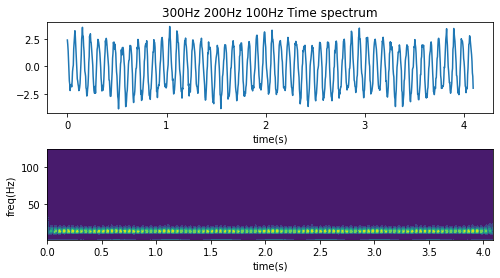

In [98]:
signal = np.array(df['smcAC'])
signal = signal[(len(signal) - 1024) // 2:(len(signal) + 1024) // 2]
cwtmatr, frequencies = pywt.cwt(signal, scales, wavename, 1 / sampling_rate)
plot_cwt(sampling_rate, signal, cwtmatr, frequencies)

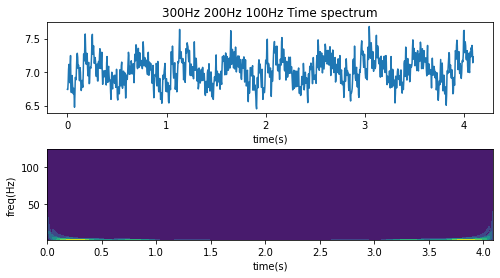

In [99]:
signal = np.array(df['smcDC'])
signal = signal[(len(signal) - 1024) // 2:(len(signal) + 1024) // 2]
cwtmatr, frequencies = pywt.cwt(signal, scales, wavename, 1 / sampling_rate)
plot_cwt(sampling_rate, signal, cwtmatr, frequencies)

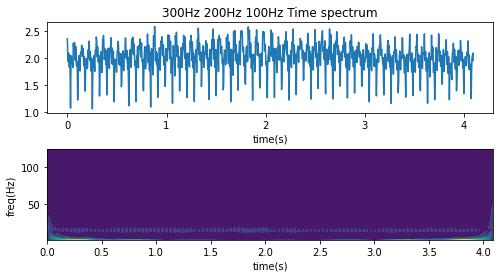

In [100]:
signal = np.array(df['vib_table'])
signal = signal[(len(signal) - 1024) // 2:(len(signal) + 1024) // 2]
cwtmatr, frequencies = pywt.cwt(signal, scales, wavename, 1 / sampling_rate)
plot_cwt(sampling_rate, signal, cwtmatr, frequencies)

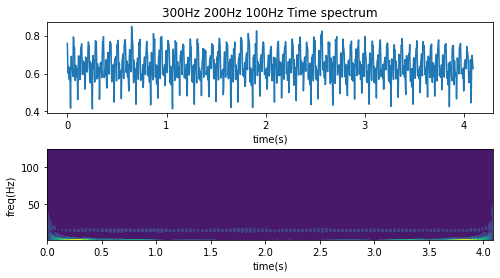

In [101]:
signal = np.array(df['vib_spindle'])
signal = signal[(len(signal) - 1024) // 2:(len(signal) + 1024) // 2]
cwtmatr, frequencies = pywt.cwt(signal, scales, wavename, 1 / sampling_rate)
plot_cwt(sampling_rate, signal, cwtmatr, frequencies)

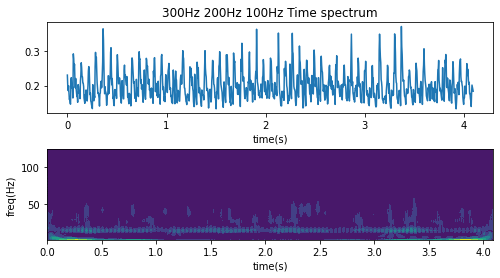

In [102]:
signal = np.array(df['AE_table'])
signal = signal[(len(signal) - 1024) // 2:(len(signal) + 1024) // 2]
cwtmatr, frequencies = pywt.cwt(signal, scales, wavename, 1 / sampling_rate)
plot_cwt(sampling_rate, signal, cwtmatr, frequencies)

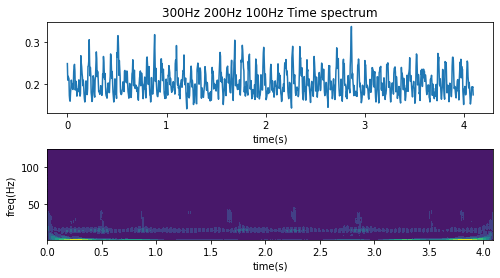

In [103]:
signal = np.array(df['AE_spindle'])
signal = signal[(len(signal) - 1024) // 2:(len(signal) + 1024) // 2]
cwtmatr, frequencies = pywt.cwt(signal, scales, wavename, 1 / sampling_rate)
plot_cwt(sampling_rate, signal, cwtmatr, frequencies)

# Useless

In [ ]:
totalscale = 256
wavename = 'morl'
sampling_rate = 5000

fc = pywt.central_frequency(wavename)
cparam = 2 * fc * totalscale
scales = cparam / np.arange(totalscale, 0, -1)

In [ ]:
path = r'data/c1'
sample_number = 3
column_number = 6
num_para = 1
length_para = 1024

columns = ['Fx', 'Fy', 'Fz', 'Ax', 'Ay', 'Az', 'AE_rms']

data_train = np.empty([sample_number * num_para, column_number, length_para])

for i in range(sample_number):
    data_path = os.path.join(path, f'c_1_{i + 1:03d}.csv')
    csv_data = pd.read_csv(data_path, names=columns)

    for k in range(column_number):
        scaler = preprocessing.StandardScaler()

        column_data = csv_data.iloc[:, k]
        column_data = np.array(column_data).reshape(-1, 1)

        column_data = scaler.fit_transform(column_data.reshape(-1, 1))
        column_data = column_data.flatten()

        for j in range(num_para):
            # 在第i个文件第k列的数据中，从正中间截取1段长度为length_para的数据  #
            start = (column_data.shape[0] // 2) - (length_para // 2)
            end = (column_data.shape[0] // 2) + (length_para // 2)
            data_train[i * num_para + j:, k, :] = column_data[start: end]

data_train = data_train[:, np.newaxis]

In [ ]:
for data in data_train:
    cwtmatrix = np.empty([data.shape[0], totalscale, data.shape[1], data.shape[2]])
    for i in range(data.shape[2]):
        for j in range(data.shape[1]):
            dataset = data[j, :, i]
            cwtmatr, frequencies = pywt.cwt(dataset, scales, wavename, 1.0 / sampling_rate)
            cwtmatrix[j, :, :, i] = cwtmatr

In [ ]:
sample = data_train[0, 0, 0, :]
sample.shape

In [ ]:
cwtmatr, frequencies = pywt.cwt(sample, scales, wavename, 1.0 / sampling_rate)
cwtmatr.shape

In [ ]:
plot_cwt(np.arange(1024) / sampling_rate, sample, cwtmatr, frequencies)

In [ ]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import pywt
from matplotlib.font_manager import FontProperties


sampling_rate = 1024
t = np.arange(0, 1.0, 1.0 / sampling_rate)
f1 = 100
f2 = 200
f3 = 300
data = np.piecewise(t, [t < 1, t < 0.8, t < 0.3],
                    [lambda t: np.sin(2 * np.pi * f1 * t), lambda t: np.sin(2 * np.pi * f2 * t),
                     lambda t: np.sin(2 * np.pi * f3 * t)])
wavename = 'cgau8'
totalscal = 256
fc = pywt.central_frequency(wavename)
cparam = 2 * fc * totalscal
scales = cparam / np.arange(totalscal, 1, -1)
[cwtmatr, frequencies] = pywt.cwt(data, scales, wavename, 1.0 / sampling_rate)
plt.figure(figsize=(8, 4))
plt.subplot(211)
plt.plot(t, data)
plt.xlabel(u"time(s)")
plt.title(u"300Hz 200Hz 100Hz Time spectrum")
plt.subplot(212)
plt.contourf(t, frequencies, abs(cwtmatr))
plt.ylabel(u"freq(Hz)")
plt.xlabel(u"time(s)")
plt.subplots_adjust(hspace=0.4)
plt.show()

In [ ]:
data.shape